In [1]:
import random
import string

def generate_password(length, use_letters=True, use_numbers=True, use_symbols=True):
    characters = ''
    if use_letters:
        characters += string.ascii_letters  # a-zA-Z
    if use_numbers:
        characters += string.digits  # 0-9
    if use_symbols:
        characters += string.punctuation  # !@#$ etc.

    if not characters:
        return "Error: No character types selected!"

    password = ''.join(random.choice(characters) for _ in range(length))
    return password

def main():
    print("=== Random Password Generator ===")
    length = int(input("Enter password length: "))
    use_letters = input("Include letters? (y/n): ").lower() == 'y'
    use_numbers = input("Include numbers? (y/n): ").lower() == 'y'
    use_symbols = input("Include symbols? (y/n): ").lower() == 'y'

    password = generate_password(length, use_letters, use_numbers, use_symbols)
    print(f"Generated Password: {password}")

if __name__ == "__main__":
    main()


=== Random Password Generator ===
Generated Password: z_'S:b


In [2]:
import random
import string
import tkinter as tk
from tkinter import messagebox

def generate_password():
    try:
        length = int(length_entry.get())
    except ValueError:
        messagebox.showerror("Invalid Input", "Password length must be a number")
        return

    characters = ''
    if letters_var.get():
        characters += string.ascii_letters
    if numbers_var.get():
        characters += string.digits
    if symbols_var.get():
        characters += string.punctuation

    if not characters:
        messagebox.showerror("Error", "Select at least one character type!")
        return

    password = ''.join(random.choice(characters) for _ in range(length))
    password_entry.delete(0, tk.END)
    password_entry.insert(0, password)

def copy_to_clipboard():
    password = password_entry.get()
    if password:
        root.clipboard_clear()
        root.clipboard_append(password)
        messagebox.showinfo("Copied", "Password copied to clipboard!")

# GUI Setup
root = tk.Tk()
root.title("Advanced Password Generator")
root.geometry("400x250")

# Widgets
tk.Label(root, text="Password Length:").pack(pady=5)
length_entry = tk.Entry(root)
length_entry.pack(pady=5)
length_entry.insert(0, "12")  # default length

letters_var = tk.BooleanVar(value=True)
numbers_var = tk.BooleanVar(value=True)
symbols_var = tk.BooleanVar(value=True)

tk.Checkbutton(root, text="Include Letters", variable=letters_var).pack()
tk.Checkbutton(root, text="Include Numbers", variable=numbers_var).pack()
tk.Checkbutton(root, text="Include Symbols", variable=symbols_var).pack()

tk.Button(root, text="Generate Password", command=generate_password).pack(pady=10)

password_entry = tk.Entry(root, width=30)
password_entry.pack(pady=5)

tk.Button(root, text="Copy to Clipboard", command=copy_to_clipboard).pack(pady=5)

root.mainloop()


Generated Password: us.u&!]![,C+Rm*;
Character Distribution: {'Letters': 6, 'Numbers': 0, 'Symbols': 10}


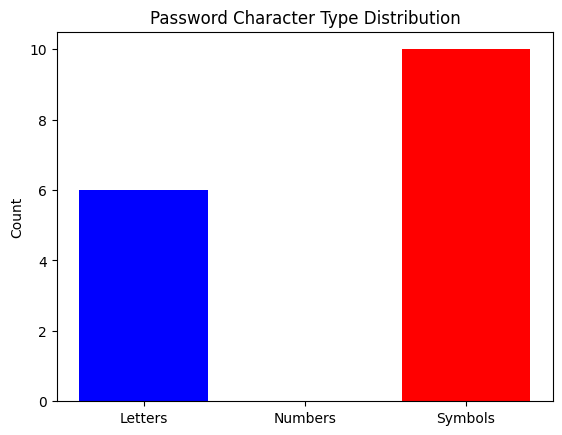

In [5]:
import random
import string
import matplotlib.pyplot as plt

# Function to generate password
def generate_password(length=12):
    characters = string.ascii_letters + string.digits + string.punctuation
    password = ''.join(random.choice(characters) for _ in range(length))
    return password

# Function to count character types
def count_types(password):
    counts = {'Letters': 0, 'Numbers': 0, 'Symbols': 0}
    for c in password:
        if c.isalpha():
            counts['Letters'] += 1
        elif c.isdigit():
            counts['Numbers'] += 1
        else:
            counts['Symbols'] += 1
    return counts

# Generate password
password = generate_password(16)
print(f"Generated Password: {password}")

# Count character types
counts = count_types(password)
print("Character Distribution:", counts)

# Visualization
plt.bar(counts.keys(), counts.values(), color=['blue', 'green', 'red'])
plt.title("Password Character Type Distribution")
plt.ylabel("Count")
plt.show()


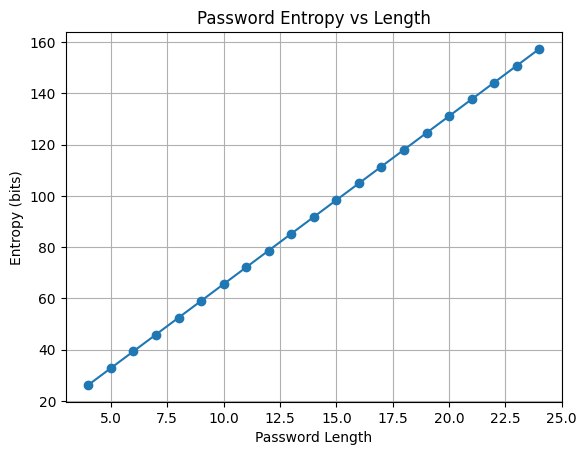

In [6]:
import matplotlib.pyplot as plt
import string
import math

def calculate_entropy(length, use_letters=True, use_numbers=True, use_symbols=True):
    pool = 0
    if use_letters:
        pool += len(string.ascii_letters)
    if use_numbers:
        pool += len(string.digits)
    if use_symbols:
        pool += len(string.punctuation)
    # Entropy in bits
    return length * math.log2(pool)

lengths = list(range(4, 25))  # password lengths 4 to 24
entropy_values = [calculate_entropy(l) for l in lengths]

plt.plot(lengths, entropy_values, marker='o')
plt.title("Password Entropy vs Length")
plt.xlabel("Password Length")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()
